In [18]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Correct path below
df = pd.read_csv('../state-farm-distracted-driver-detection/driver_imgs_list.csv')
print(df.head())


  subject classname            img
0    p002        c0  img_44733.jpg
1    p002        c0  img_72999.jpg
2    p002        c0  img_25094.jpg
3    p002        c0  img_69092.jpg
4    p002        c0  img_92629.jpg


In [19]:
df['path'] = df.apply(lambda row: os.path.join(
    '../state-farm-distracted-driver-detection/imgs/train',
    row['classname'],
    row['img']), axis=1)

print("Sample dataframe rows with image paths:")
print(df.head())


Sample dataframe rows with image paths:
  subject classname            img  \
0    p002        c0  img_44733.jpg   
1    p002        c0  img_72999.jpg   
2    p002        c0  img_25094.jpg   
3    p002        c0  img_69092.jpg   
4    p002        c0  img_92629.jpg   

                                                path  
0  ../state-farm-distracted-driver-detection/imgs...  
1  ../state-farm-distracted-driver-detection/imgs...  
2  ../state-farm-distracted-driver-detection/imgs...  
3  ../state-farm-distracted-driver-detection/imgs...  
4  ../state-farm-distracted-driver-detection/imgs...  


In [20]:
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['classname'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['classname'])

print(f"Total images: {len(df)}")
print(f"Train: {len(train_df)}")
print(f"Validation: {len(val_df)}")
print(f"Test: {len(test_df)}")

print("\nTrain class distribution:")
print(train_df['classname'].value_counts())
print("\nValidation class distribution:")
print(val_df['classname'].value_counts())
print("\nTest class distribution:")
print(test_df['classname'].value_counts())


Total images: 22424
Train: 15696
Validation: 3364
Test: 3364

Train class distribution:
classname
c0    1742
c3    1642
c6    1628
c4    1628
c2    1622
c5    1618
c1    1587
c9    1490
c7    1401
c8    1338
Name: count, dtype: int64

Validation class distribution:
classname
c0    374
c3    352
c4    349
c6    348
c2    348
c5    347
c1    340
c9    320
c7    300
c8    286
Name: count, dtype: int64

Test class distribution:
classname
c0    373
c3    352
c4    349
c6    349
c5    347
c2    347
c1    340
c9    319
c7    301
c8    287
Name: count, dtype: int64


In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

def make_generator(dataframe, datagen, shuffle=True):
    return datagen.flow_from_dataframe(
        dataframe,
        x_col='path',
        y_col='classname',
        target_size=IMG_SIZE,
        class_mode='categorical',
        batch_size=BATCH_SIZE,
        shuffle=shuffle,
        seed=42
    )

train_gen = make_generator(train_df, train_datagen)
val_gen   = make_generator(val_df, val_test_datagen, shuffle=False)
test_gen  = make_generator(test_df, val_test_datagen, shuffle=False)


Found 15696 validated image filenames belonging to 10 classes.
Found 3364 validated image filenames belonging to 10 classes.
Found 3364 validated image filenames belonging to 10 classes.


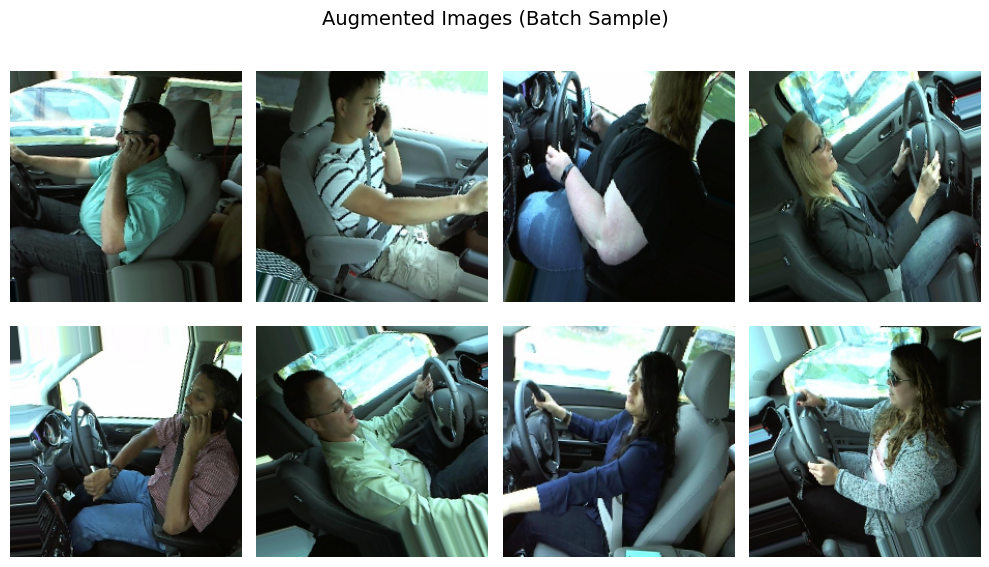

Shape of one batch:  (32, 224, 224, 3)


In [23]:
import matplotlib.pyplot as plt

x_batch, y_batch = next(train_gen)

plt.figure(figsize=(10,6))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_batch[i])
    plt.axis('off')
plt.suptitle("Augmented Images (Batch Sample)", fontsize=14)
plt.tight_layout()
plt.show()
print("Shape of one batch: ", x_batch.shape)


In [24]:
class_indices = train_gen.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}

print("Class name to index mapping:", class_indices)
print("Index to class mapping:", idx_to_class)


Class name to index mapping: {'c0': 0, 'c1': 1, 'c2': 2, 'c3': 3, 'c4': 4, 'c5': 5, 'c6': 6, 'c7': 7, 'c8': 8, 'c9': 9}
Index to class mapping: {0: 'c0', 1: 'c1', 2: 'c2', 3: 'c3', 4: 'c4', 5: 'c5', 6: 'c6', 7: 'c7', 8: 'c8', 9: 'c9'}
